# Comprobación de Árbol de Búsqueda Binario (is_bst)

La comprobación de si un árbol binario es un árbol de búsqueda binario (BST, por sus siglas en inglés) es una operación esencial en estructuras de datos. Un árbol de búsqueda binario tiene la propiedad particular de que para cada nodo, todos los elementos en el subárbol izquierdo son menores que el nodo y todos los elementos en el subárbol derecho son mayores.

- **Definición de Árbol de Búsqueda Binario:**
  - Para todo nodo `N`, todos los nodos en el subárbol izquierdo de `N` deben ser menores que `N`.
  - Para todo nodo `N`, todos los nodos en el subárbol derecho de `N` deben ser mayores que `N`.
  - No deben existir valores duplicados.

- **Aplicaciones de la Comprobación BST:**
  - Es crucial para operaciones de búsqueda eficientes en árboles binarios.
  - Fundamental en la validación de estructuras de datos antes de realizar operaciones como inserción y eliminación, asegurando que las propiedades del BST se mantengan.
  - Importante en algoritmos que asumen que la entrada es un BST para garantizar su correcta ejecución y eficiencia.

## Implementación en Python

Para implementar una función que verifique si un árbol binario es un BST, podemos realizar un recorrido en orden y verificar que los elementos estén en orden ascendente. Otra estrategia implica validar recursivamente cada nodo, asegurando que los nodos izquierdos sean menores y los nodos derechos mayores, pasando los límites correspondientes a cada llamada recursiva.


Aquí te muestro cómo implementar este método en la clase [`BST`](src/BST.py):

In [7]:
# Código utilitario
from src.visualization import visualize_bt
# ver src/BinaryTree.py
from src.BinaryTree import BinaryTree

In [8]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

def is_bst(node, min_value=float('-inf'), max_value=float('inf')):
    """
    Determina si un árbol binario es un árbol de búsqueda binario (BST).

    Args:
    - node: El nodo actual que estamos visitando.
    - min_value: El valor mínimo que debe tener el nodo actual para cumplir con las
      condiciones de BST. Inicialmente, no hay mínimo (menos infinito).
    - max_value: El valor máximo que debe tener el nodo actual para cumplir con las
      condiciones de BST. Inicialmente, no hay máximo (infinito).

    Returns:
    - True si la estructura del árbol cumple con las condiciones de BST, False de lo contrario.
    """
    # Un árbol vacío es un BST
    if node is None:
        return True

    # Si el valor del nodo actual no cumple con las condiciones de min/max, no es un BST
    if not (min_value < node.data < max_value):
        return False

    # Recursivamente verificamos los subárboles izquierdo y derecho con los nuevos límites
    return (is_bst(node.left, min_value, node.data) and
            is_bst(node.right, node.data, max_value))

# Ejemplo de uso:
if __name__ == "__main__":
    # Crear un árbol binario
    root = Node(3)
    root.left = Node(2)
    root.right = Node(5)
    root.left.left = Node(1)
    root.right.left = Node(4)
    root.right.right = Node(6)

    # Verificar si el árbol es un BST
    print("¿El árbol es un BST?", is_bst(root))  # Debería imprimir True


¿El árbol es un BST? True


## Pruebas de `is_bst`

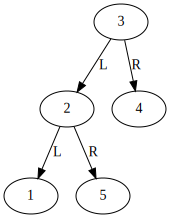

¿El árbol es un BST? False


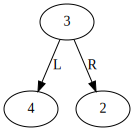

¿El árbol es un BST? False


In [9]:
# Creación de un árbol que sí es un BST
bst = BinaryTree()
bst.insert(3)
bst.insert(2)
bst.insert(4)
bst.insert(1)
bst.insert(5)

# Visualizar el árbol
dot = visualize_bt(bst)
display(dot)

print("¿El árbol es un BST?", is_bst(bst.root))  # Debería ser True

# Creación de un árbol que no es un BST
not_bst = BinaryTree()
not_bst.insert(3)
not_bst.insert(4)  # Incorrecto para demostración, se inserta a la izquierda
not_bst.insert(2)  # Incorrecto para demostración, se inserta a la derecha


# Visualizar el árbol
dot = visualize_bt(not_bst)
display(dot)

print("¿El árbol es un BST?", is_bst(not_bst.root))  # Debería ser False

## Complejidad del Algoritmo

- **Complejidad de Tiempo:** O(n), donde n es el número de nodos en el árbol. Esto se debe a que cada nodo se visita exactamente una vez.
- **Complejidad del Espacio:** O(h), donde h es la altura del árbol. El espacio adicional se utiliza en la pila de llamadas durante la ejecución recursiva.

## Ejercicios Prácticos

1. Modificar el método `is_bst` para que identifique y retorne el nodo que viola la propiedad BST si el árbol no es un BST.
2. Escribir un método que transforme cualquier árbol binario en un BST manteniendo los mismos nodos (sin cambiar los valores de los nodos).

## Soluciones a los Ejercicios

### 1: Identificar Nodo que Viola la Propiedad BST

La idea es modificar `is_bst` para devolver no solo si el árbol es un BST sino también el nodo que infringe la regla si el árbol no es BST. Aquí está la implementación ajustada:

In [10]:
def is_bst_and_violating_node(node, left=None, right=None):
    """
    Comprueba si un árbol binario es un BST y encuentra el nodo que viola esta propiedad.

    :param node: Nodo actual en el árbol.
    :param left: Valor máximo esperado para el subárbol izquierdo.
    :param right: Valor mínimo esperado para el subárbol derecho.
    :return: Tupla (es_bst, nodo_violador) donde es_bst indica si el árbol es un BST
             y nodo_violador es el primer nodo encontrado que viola la propiedad BST.
    """
    if node is None:
        return True, None

    if (left is not None and node.data <= left) or (right is not None and node.data >= right):
        return False, node

    is_left_bst, left_node = is_bst_and_violating_node(node.left, left, node.data)
    if not is_left_bst:
        return False, left_node

    is_right_bst, right_node = is_bst_and_violating_node(node.right, node.data, right)
    if not is_right_bst:
        return False, right_node

    return True, None

# Incorporar la función en BinaryTree
BinaryTree.is_bst_and_violating_node = lambda self: is_bst_and_violating_node(self.root)

# Uso de la función con un árbol de ejemplo
_, violating_node = bst.is_bst_and_violating_node()
if violating_node:
    print(f"El nodo que viola la propiedad BST tiene el valor {violating_node.data}")
else:
    print("El árbol es un BST")

El nodo que viola la propiedad BST tiene el valor 5


### 2: Transformar un Árbol Binario en un BST

Para transformar cualquier árbol binario en un BST sin alterar los valores de los nodos, se pueden seguir estos pasos:

1. Realizar un recorrido en orden del árbol y almacenar los nodos en una lista.
2. Ordenar la lista de nodos según sus valores.
3. Volver a realizar un recorrido en orden del árbol y reemplazar los valores de los nodos con los valores ordenados de la lista.

Aquí está la implementación de estos pasos:

In [11]:
def inorder_traversal_store(node, array):
    if node is None:
        return
    inorder_traversal_store(node.left, array)
    array.append(node)
    inorder_traversal_store(node.right, array)

def rebuild_bst(node, nodes_iter):
    if node is None:
        return
    rebuild_bst(node.left, nodes_iter)
    node.data = next(nodes_iter).data  # Actualizar el valor del nodo
    rebuild_bst(node.right, nodes_iter)

def binary_tree_to_bst(binary_tree):
    nodes = []
    inorder_traversal_store(binary_tree.root, nodes)
    nodes_sorted = sorted(nodes, key=lambda x: x.data)
    nodes_iter = iter(nodes_sorted)
    rebuild_bst(binary_tree.root, nodes_iter)

# Aplicación del método para convertir un árbol binario en un BST
binary_tree_to_bst(not_bst)
print("El árbol ha sido transformado en un BST:", not_bst.is_bst()[0])  # Debería devolver True

AttributeError: 'BinaryTree' object has no attribute 'is_bst'

Estas soluciones abordan de manera efectiva los ejercicios planteados, brindando una forma concreta y aplicable de profundizar en la comprensión y manipulación de árboles binarios y árboles de búsqueda binaria.
